# Capitulo 2 : Distribuciones de Datos y Muestras

## Carga de los datos

In [1]:
# importamos librerias
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

Definimos rutas a los conjuntos de datos. Si no mantienes los datos en el mismo directorio que el codigo, adapte los nombres de las rutas

In [3]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

## Distribucion Muestral del Estadistico

Los datos que vamos a utilizar refieren a los ingresos anuales de los solicitantes de prestamos de un Club. Vamos a probar que la distribucion muestral de un estadistico como la Media adopta la forma de campana y que a mientras la muestra sea cada vez mas grande mas estrecha se vuelva tal distribucion

In [4]:
# cargar datos
loans_income = pd.read_csv(LOANS_INCOME_CSV)
loans_income.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


Los datos vienen en una columna de un dataframe. Para mayor comodidad en el tratamiento, convertimos los datos en una serie.

In [5]:
# convertir en una serie el dataframe. Debe poseer una columna
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

De los datos tomamos una muestra de 1000 valores que corresponde al ingreso de 1000 solicitantes de prestamo.

In [6]:
# Creamos la muestra de los 1000 valores
sample_data = pd.DataFrame({
    'income':loans_income.sample(1000),
    'type':'Data'
})
sample_data.head()

,income,type
6800,165000,Data
45478,49000,Data
44881,30000,Data
26518,83000,Data
29701,72500,Data


Ahora, creamos una muestra de 1000 medias para 5 valores, es decir, se toman los ingresos de 5 solicitantes aleatorios y se calcula su media, luego se toman los ingresos nuevamente de 5 solicitantes diferentes y se calcula su media. Este paso se repite 1000 veces y se almacenan en un dataframe

In [7]:
# creamos la muestra de 1000 media para 5 valores
sample_mean_05 = pd.DataFrame({
    'income':[loans_income.sample(5).mean() for _ in range(1000)],
    'type':'Media de 5'
})
sample_mean_05.head()

,income,type
0,80168.4,Media de 5
1,73968.8,Media de 5
2,69916.0,Media de 5
3,57200.0,Media de 5
4,56000.0,Media de 5


Finalmente, creamos una muestra de 1000 media para 20 valores siguiendo el mismo procedimiento anterior. 

In [8]:
# creamos la muestra de 1000 media para 20 valores
sample_mean_20 = pd.DataFrame({
    'income':[loans_income.sample(20).mean() for _ in range(1000)],
    'type':'Media de 20'
})
sample_mean_20.head()

,income,type
0,71663.90,Media de 20
1,69832.15,Media de 20
2,63466.40,Media de 20
3,75075.20,Media de 20
4,74342.05,Media de 20


In [9]:
# Agrupamos los resultados en un solo df
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
6800   165000.0  Data
45478   49000.0  Data
44881   30000.0  Data
26518   83000.0  Data
29701   72500.0  Data


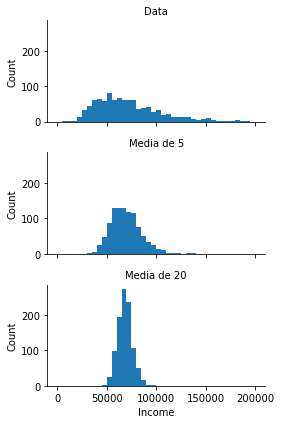

In [10]:
# Graficamos los histogramas
grid = sns.FacetGrid(
    results, 
    col='type', # numero de graficos 
    col_wrap=1, # ordenado en fila(0) o columnas(1)
    height=2,   # ancho de graficos
    aspect=2,   # relacion entra ancho y alto del grafico
) 

# Grafico para cada type
grid.map(plt.hist, 'income', range=[0, 200000], bins=40)
grid.set_axis_labels('Income', 'Count') # titulo de los ejes
grid.set_titles('{col_name}') # titulo de cada grafico
plt.tight_layout();


Ahora, probemos con otra metrica como la Mediana y veamos su distribucion en las diferentes muestras

In [11]:
# Creamos la muestra de los 1000 valores
sample2_data = pd.DataFrame({
    'income':loans_income.sample(1000),
    'type':'Data'
})
sample_data.head()

,income,type
6800,165000,Data
45478,49000,Data
44881,30000,Data
26518,83000,Data
29701,72500,Data


In [12]:
# creamos la muestra de 1000 media para 5 valores
sample2_mean_05 = pd.DataFrame({
    'income':[loans_income.sample(5).median() for _ in range(1000)],
    'type':'Mediana de 5'
})
sample2_mean_05.head()

,income,type
0,57000.0,Mediana de 5
1,58000.0,Mediana de 5
2,55000.0,Mediana de 5
3,65000.0,Mediana de 5
4,40000.0,Mediana de 5


In [13]:
# creamos la muestra de 1000 media para 20 valores
sample2_mean_20 = pd.DataFrame({
    'income':[loans_income.sample(20).median() for _ in range(1000)],
    'type':'Mediana de 20'
})
sample2_mean_20.head()

,income,type
0,66000.0,Mediana de 20
1,65000.0,Mediana de 20
2,67500.0,Mediana de 20
3,50000.0,Mediana de 20
4,61500.0,Mediana de 20


In [14]:
# Agrupamos los resultados en un solo df
results2 = pd.concat([sample2_data, sample2_mean_05, sample2_mean_20])
print(results2.head())

        income  type
5869   32000.0  Data
44863  57000.0  Data
3532   39000.0  Data
48825  37000.0  Data
28208  60000.0  Data


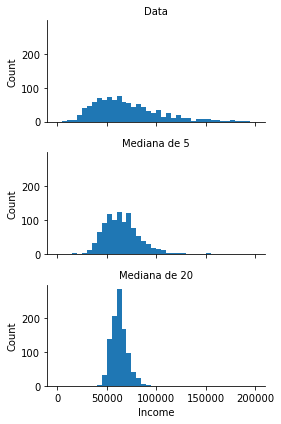

In [15]:
# Graficamos los histogramas
grid = sns.FacetGrid(
    results2, 
    col='type', # numero de graficos 
    col_wrap=1, # ordenado en fila(0) o columnas(1)
    height=2,   # ancho de graficos
    aspect=2,   # relacion entra ancho y alto del grafico
) 

# Grafico para cada type
grid.map(plt.hist, 'income', range=[0, 200000], bins=40)
grid.set_axis_labels('Income', 'Count') # titulo de los ejes
grid.set_titles('{col_name}') # titulo de cada grafico
plt.tight_layout();

Vemos el mismo resultado obtenido al utilizar la media

## Bootstrap

Vamos a estimar la mediana y su variabilidad para los ingresos de los clientes que solicitan un prestamo

In [16]:
# importamos libreria para el remuestreo
from sklearn.utils import resample

In [17]:
# creamos una lista donde guardamos los resultados
results = []

# numero de iteraciones de bootstrap: 1000
for R in range(1000):
    # tomamos una muestra con reposicion de los datos
    sample = resample(loans_income)
    # calculamos la mediana de la muestra y guardamos el resultado
    results.append(sample.median())

# convertimos la lista con los resultados en una serie
results = pd.Series(results)

# imprimimos los resultados
print('Estadistica del Bootstrap')
print(f'Mediana Original: {loans_income.median()}')
print(f'Sesgo: {results.mean() - loans_income.median()}')
print(f'Error Estandar: {results.std()}')

Estadistica del Bootstrap
Mediana Original: 62000.0
Sesgo: -82.44049999999697
Error Estandar: 226.6812334344019


Que resultados obtendriamos si variamos R? Probemos con R = 100

In [18]:
# creamos una lista donde guardamos los resultados
results = []

# numero de iteraciones de bootstrap: 1000
for R in range(100):
    # tomamos una muestra con reposicion de los datos
    sample = resample(loans_income)
    # calculamos la mediana de la muestra y guardamos el resultado
    results.append(sample.median())

# convertimos la lista con los resultados en una serie
results = pd.Series(results)

# imprimimos los resultados
print('Estadistica del Bootstrap')
print(f'Mediana Original: {loans_income.median()}')
print(f'Sesgo: {results.mean() - loans_income.median()}')
print(f'Error Estandar: {results.std()}')

Estadistica del Bootstrap
Mediana Original: 62000.0
Sesgo: -67.61000000000058
Error Estandar: 207.27455295580853


En este caso, vemos como el sesgo aumenta es decir, los datos tienden a estar mas esparcidos. Ahora probemos con un R de 10.000

In [19]:
# creamos una lista donde guardamos los resultados
results = []

# numero de iteraciones de bootstrap: 1000
for R in range(10000):
    # tomamos una muestra con reposicion de los datos
    sample = resample(loans_income)
    # calculamos la mediana de la muestra y guardamos el resultado
    results.append(sample.median())

# convertimos la lista con los resultados en una serie
results = pd.Series(results)

# imprimimos los resultados
print('Estadistica del Bootstrap')
print(f'Mediana Original: {loans_income.median()}')
print(f'Sesgo: {results.mean() - loans_income.median()}')
print(f'Error Estandar: {results.std()}')

Estadistica del Bootstrap
Mediana Original: 62000.0
Sesgo: -80.29125000000204
Error Estandar: 226.46749634577012


Vemos que el sesgo disminuye a medida que aumentamos R, esto prueba lo dicho en la teoria sobre la cantidad de remuestreo que se requiere segun la precision que se desea.

## Intervalos de Confianza

Vamos a estimar un intervalo de confianza del 90% para el ingreso anual medio de los solicitantes de prestamos, basados en una muestra de 20 solicitantes aleatorios, con la cual se generan 500 muestras bootstrap cuya media ha sido de 55.734$

In [23]:
# imprime la media de los ingresos anuales de toda la muestra
print(loans_income.mean())

68760.51844


In [25]:
# fijar una semilla aleatoria para asegurar la reproducibilidad de los datos
import numpy as np
np.random.seed(seed=3)

In [26]:
# Crear una muestra aleatoria sin reemplazo de 20 ingresos de la muestra completa
sample20 = resample(loans_income, n_samples=20, replace=False)
sample20

35437     54000
16296     25000
23122     75000
9436      56000
11959    116262
3313      85000
49651     13000
2837      60000
46465     54000
26004     30000
42728    160000
26264     83300
17830     34000
8283      47000
24455     24000
24094     31000
12649     26000
46661     25000
37609     21120
10439     95000
Name: x, dtype: int64

In [27]:
# imprime la media de la muestra aleatoria de 20 ingresos
sample20.mean()

55734.1

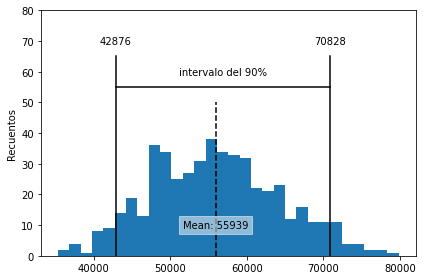

In [32]:
# creamos lista para almacenar las medias de las muestras bootstrap
results = []

# generar 500 muestras bootstrap
for R in range(500):
    # crea una muestra bootstrap de la muestra aleatoria de 20 ingresos
    sample = resample(sample20)
    # agrega la media de la muestra bootstrap a la lista
    results.append(sample.mean())
# Convierte la lista en una Serie
results = pd.Series(results)

# calcular los cuantiles 5 y 95 para estimar el intervalo de confianza del 90% para la
# media de los ingresos
intervalo_conf = list(results.quantile([0.05, 0.95]))
# histograma con las medias de las muestras bootstrap
ax = results.plot.hist(bins=30, figsize=(6, 4))
# linea horizontal que representa el intervalo de confianza del 90%
ax.plot(intervalo_conf, [55, 55], color='black')

# itera sobre cada cuantil en el intervalo de confianza
for x in intervalo_conf:
    # linea vertical para cada cuantil
    ax.plot([x, x], [0, 65], color='black')
    # etiqueta el valor de cada cuantil
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
    # etiqueta el intervalo de confianza
ax.text(sum(intervalo_conf) / 2, 60, 'intervalo del 90%',
        horizontalalignment='center', verticalalignment='center')

# calcula la media de las medias de las muestras bootstrap
meanIncome = results.mean()
# linea vertical punteada que representa la media de las medias de las muestras bootstrap
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
# etiqueta la media de las medias 
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')

# establece el limite del eje Y
ax.set_ylim(0, 80)
# etiqueta del eje Y
ax.set_ylabel('Recuentos')
# ajusta el grafico a la figura
plt.tight_layout();